In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import *
import scikitplot.metrics as plotmetrics
import sklearn.metrics as skmetrics
matplotlib.use('TkAgg')

In [2]:
#load dataset
wine_columns=['label','alcohol', 'malic_acid','ash','alcalinity','magnesium','phenol','flavanoids','nonfla_penols',
              'proath_c','color','hue','od280','proline']
df = pd.read_csv('../data/wine.data', names=wine_columns)
df.sample(5)

,label,alcohol,malic_acid,ash,alcalinity,magnesium,phenol,flavanoids,nonfla_penols,proath_c,color,hue,od280,proline
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415
57,1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
55,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120


## 1 Explantory data analysis
###1.1 basic description
There are 178 data entries in the dataset, each data point has 13 attributes and one class label, the name and 
definition of the attributes are defined as following:

1. Alcohol (alcohol): the amount of alcohol contains
2. Malic acid (malic_acid): a organic acid the produce the flavor of sour taste of fruit
3. Ash (ash): inorganic matter that remains after evaporation and incineration
4. Alcalinity of ash (alcalinity): The alkalinity of the ash is defined as the sum of cations, other than the ammonium 
ion, combined with the organic acids in the wine. The alkalinity of ash will be expressed in milliequivalents per litre 
or in grams per litre of potassium carbonate.
5. Magnesium (magnesium): is a metal element that might be good at health. Some material suggests that it's related to 
ash
6. Total Phenols (phenols): responsible for most flavor and body of the wine, consists of following three parts: 
Benzaldehyde (vanillin) and Benzoic acid (Vanillic and Gallic acids); Catechins(largest quantity of phenols); Resveratrol 
7. Flavanoids (flavanoids):  antioxidants. Antioxidants help prevent certain molecules, known as free radicals, from 
damaging cells.
8. Nonflavaniod phenols (nonfla_penols):phenols that are not flavanoid
9. Proanthocyanins (proath_c) : Proanthocyanidins play an important role in wine; with the capability to bind salivary 
proteins, these condensed tannins strongly influence the perceived astringency of the wine. 
10. Color intensity (color) :  As a very general rule of thumb, the intensity of a wine's color is directly proportional
 to the intensity of the wine's flavor. Paler wines are generally milder while deep rich colors represent more robust 
 flavors.
11. Hue (hue): The hues of red wines range from pink to varying shades of purple. You'll find lighter shades in wines 
such as Beaujolais and Pinot Noir and deeper, darker colors in wines like Cabernet Sauvignon, Syrah, and Merlot.
12. OD280/OD315 of diluted wine (od280): od280 is a measurement that can be used to measure concentrated protein. No 
explanation of od315 has been found, it should be another kind of measurement
13. Proline (proline) : Proline is typically the most abundant amino acid present in grape juice and wine. The amount 
present is influenced by viticultural and winemaking factors and can be of diagnostic importance.

In [3]:
# check duplication
check_duplication = df.duplicated()
duplicated = df[check_duplication]
print(duplicated)

Empty DataFrame
Columns: [label, alcohol, malic_acid, ash, alcalinity, magnesium, phenol, flavanoids, nonfla_penols, proath_c, color, hue, od280, proline]
Index: []


In [4]:
# check missing value
empty = pd.isnull(df)
has_miss = df[empty]
print(True in has_miss)

False


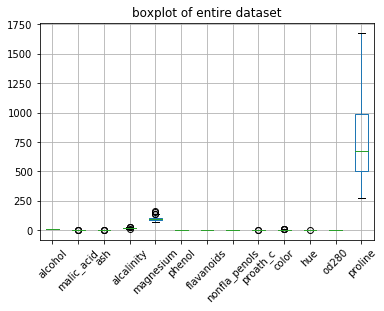

In [5]:
df.drop(['label'],axis=1).boxplot(rot=45)
plt.title('boxplot of entire dataset')
plt.show()

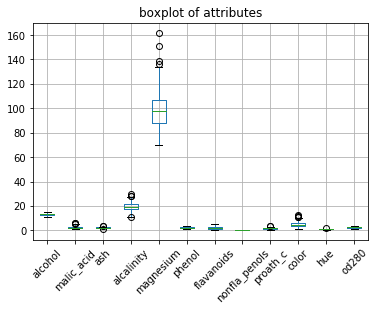

In [6]:
# check outliers
df_ = df.drop(['label','proline'],axis=1)
df_.boxplot(rot=45)
plt.title('boxplot of attributes')
# plt.set_xticklabels(aax.get_xticklabels(), rotation=40, ha="right")
plt.show()

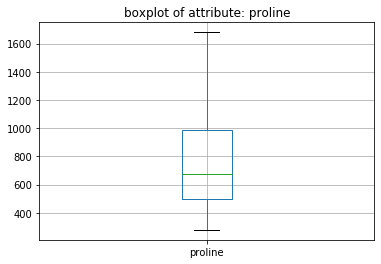

In [7]:
df_ = df['proline'].to_frame()
df_.boxplot()
plt.title('boxplot of attribute: proline')
plt.show()

As we can see from the plots, outliers exits in the following attributes: Malic acid (malic_acid), ash, (Alcalinity of ash) alcalinity, 
Proanthocyanins(proath_c), color intensity (color), hue.
The following section select the outliers based on these attributes with interquantile range

In [8]:
# select the suspicious columns
suspicious_attributes = df[['malic_acid', 'ash','alcalinity', 'proath_c','color','hue']]
Q1 = suspicious_attributes.quantile(0.25)
Q3 = suspicious_attributes.quantile(0.75)
iqr = Q3 - Q1
lower_bound = Q1-1.5*iqr
upper_bound = Q3+1.5*iqr
#outliers = adult_numrics[((adult_numrics<lower_bound) | (adult_numrics>upper_bound)).any(axis=1)]
outliers = suspicious_attributes[((suspicious_attributes<lower_bound)|(suspicious_attributes>upper_bound)).any(axis=1)]
print(outliers)
inliner_df = df.drop(outliers.index)
print(len(inliner_df.index))
# we will simply keep the outliers

     malic_acid   ash  alcalinity  proath_c  color   hue
25         2.05  3.22        25.0      1.92   3.58  1.13
59         0.94  1.36        10.6      0.42   1.95  1.05
73         1.67  2.60        30.0      1.96   3.35  1.31
95         1.52  2.20        19.0      3.28   2.60  1.16
110        3.74  1.82        19.5      3.58   2.90  0.75
115        1.51  2.20        21.5      2.01   1.90  1.71
121        2.05  3.23        28.5      1.87   6.00  0.93
123        5.80  2.13        21.5      2.01   2.60  0.73
127        2.13  2.78        28.5      1.76   3.00  0.97
137        5.51  2.64        25.0      1.10   5.00  0.82
151        2.67  2.48        22.0      1.26  10.80  0.48
158        1.68  2.70        25.0      2.70  13.00  0.57
159        1.67  2.64        22.5      2.29  11.75  0.57
166        3.70  2.60        23.0      1.46  10.68  0.85
173        5.65  2.45        20.5      1.06   7.70  0.64
163


[Text(0.5, 0, 'alcohol'),
 Text(1.5, 0, 'malic_acid'),
 Text(2.5, 0, 'ash'),
 Text(3.5, 0, 'alcalinity'),
 Text(4.5, 0, 'magnesium'),
 Text(5.5, 0, 'phenol'),
 Text(6.5, 0, 'flavanoids'),
 Text(7.5, 0, 'nonfla_penols'),
 Text(8.5, 0, 'proath_c'),
 Text(9.5, 0, 'color'),
 Text(10.5, 0, 'hue'),
 Text(11.5, 0, 'od280'),
 Text(12.5, 0, 'proline')]

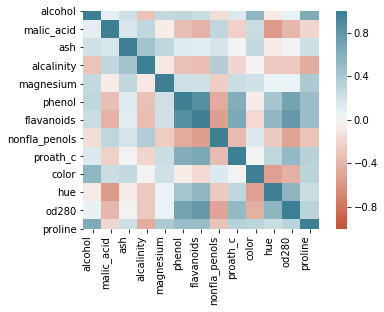

In [9]:
#find attribute dependency
#TODO
df_ = df.drop(['label'], axis=1)
corr = df_.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')

# 2. Data Preprocessing

We have observed that Total Phenols and Flavanoids are highly correlated attributes, we will simply drop flavaniods 
attribute. We will not create any new attribute due to lack of domain knowledge. 

As we can see from the box plot, attribute Proline distributed in a significant larger area compared to other attribute.
Attribute Magnesium also have a larger value compared to the rest of the values.  
The scaling technique we will apply here is to first apply a logarithmic operation with base ten to attribute Proline 
and then to apply a minmax rescaling (linear rescaling) to all fo the attribute to set them into the section of 0~1.

We will first apply log rescaling to the Proline attribute a train test split, and do the linear rescaling on the 
training set; then the same rescaling techniques are applied to the testing set with the parameters obtained form 
training set. The reason of doing so is that log rescaling here is not parametric operation (only a 'hyperparameter' base
selected before applying, but min max rescaling require the knowlege of min and max value of each attribute, so the 
strategy described above can make sure the knowledge of minmum value and maximum value of each attribute in training set
is not implicitly passed to the model)  

In [10]:
df_selected = df.drop(['flavanoids'],axis=1)
# labels = pd.get_dummies(df_selected['label'],prefix='label')
df_selected['proline'] = np.log(df_selected['proline'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_selected.drop(['label'],inplace=False, axis=1), 
                                                                    df_selected['label'], test_size=0.5)
wine_columns_ = wine_columns[:]
wine_columns_.remove('flavanoids')
wine_columns_.remove('label')
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train_df = pd.DataFrame(X_train, columns=wine_columns_)
x_test_df = pd.DataFrame(X_test, columns=wine_columns_)

y_train_one_hot = pd.get_dummies(y_train, prefix='label')
y_test_one_hot = pd.get_dummies(y_test, prefix='label')

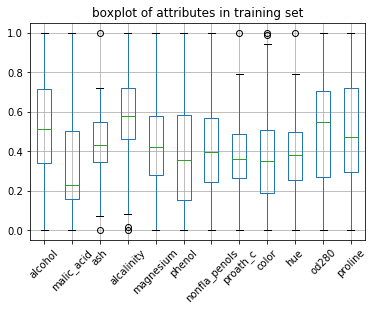

In [11]:
x_train_df.boxplot(rot=45)
plt.title('boxplot of attributes in training set')
plt.show()

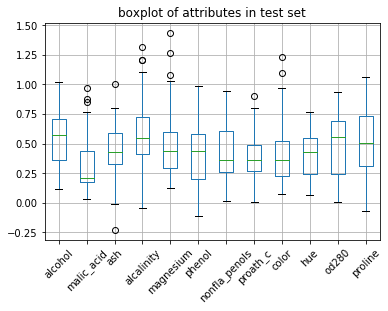

In [12]:
x_test_df.boxplot(rot=45)
plt.title('boxplot of attributes in test set')
plt.show()

# 3. build and evaluate clssifiers

In [26]:
classifier_name = ['Logistic Regression', 'KNN classifier', 'Decision Tree', 'Navie bayes', 'Linear SVM classifier',
                   'Random Forest']
logistic_regressor = linear_model.LogisticRegression()
knn = neighbors.KNeighborsClassifier()
decision_tree = tree.DecisionTreeClassifier()
nb = naive_bayes.GaussianNB()
linearSVM = svm.LinearSVC()
random_forest = ensemble.RandomForestClassifier()
all_classifiers = [logistic_regressor, knn, decision_tree, nb, linearSVM, random_forest]
dummies_classifiers = []
dummies_classifiers.append(knn)
dummies_classifiers.append(decision_tree)
dummies_classifiers.append(random_forest)
one_dim_classifier = []
one_dim_classifier.append(logistic_regressor)
one_dim_classifier.append(nb)
one_dim_classifier.append(linearSVM)

In [43]:
def fit_eval(classifier, attribute_train, label_train, attribute_test, label_test):
    
    classifier.fit(attribute_train, label_train)
    prediction = classifier.predict(attribute_test)
    accuracy = classifier.score(attribute_test, label_test)
    report = skmetrics.classification_report(label_test, prediction, output_dict=True)
    multilabel_confusion_matrix = skmetrics.multilabel_confusion_matrix(label_test, prediction)
    jaccard = skmetrics.jaccard_score(label_test, prediction, average='macro')
    return {'report':report, 'confusion_matrix':multilabel_confusion_matrix, 'jaccard': jaccard,'accuracy':accuracy}

In [44]:
result = {}
for i in range(6):
    cls = all_classifiers[i]
    if cls in dummies_classifiers:
        eval_score = fit_eval(cls, X_train, y_train_one_hot, X_test,y_test_one_hot)
        result[classifier_name[i]] = eval_score
    elif cls in one_dim_classifier:
        eval_score = fit_eval(cls, X_train, y_train, X_test,y_test)
        result[classifier_name[i]] = eval_score
    # print(classifier_name[i])
    # print(result[classifier_name[i]])

C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [29]:
print(result)

{'Logistic Regression': {'report': {'1': {'precision': 0.9411764705882353, 'recall': 1.0, 'f1-score': 0.9696969696969697, 'support': 32}, '2': {'precision': 1.0, 'recall': 0.9393939393939394, 'f1-score': 0.96875, 'support': 33}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, 'accuracy': 0.9775280898876404, 'macro avg': {'precision': 0.9803921568627452, 'recall': 0.9797979797979798, 'f1-score': 0.9794823232323232, 'support': 89}, 'weighted avg': {'precision': 0.9788499669530735, 'recall': 0.9775280898876404, 'f1-score': 0.9775174497786857, 'support': 89}}, 'confusion_matrix': array([[[55,  2],
        [ 0, 32]],

       [[56,  0],
        [ 2, 31]],

       [[65,  0],
        [ 0, 24]]], dtype=int64), 'jaccard': 0.960190136660725}, 'KNN classifier': {'report': {'0': {'precision': 0.9142857142857143, 'recall': 1.0, 'f1-score': 0.955223880597015, 'support': 32}, '1': {'precision': 0.9666666666666667, 'recall': 0.8787878787878788, 'f1-score': 0.9206349206349207, 's

In [45]:
print(result.keys())
for name in result.keys():
    print(name)
    print(result[name]['accuracy'])

dict_keys(['Logistic Regression', 'KNN classifier', 'Decision Tree', 'Navie bayes', 'Linear SVM classifier', 'Random Forest'])
Logistic Regression
0.9775280898876404
KNN classifier
0.9438202247191011
Decision Tree
0.797752808988764
Navie bayes
0.9662921348314607
Linear SVM classifier
0.9775280898876404
Random Forest
0.8764044943820225


# Reference
[1] http://www.wineeducation.com/wineismadeof.html  
[2] https://www.institut-heidger.de/en/asche-summe-aller-mineralstoffe/  
[3] https://www.verywellhealth.com/red-wine-and-longevity-2224017  
[4] https://www.chron.com/news/health/article/The-skinny-on-red-wine-and-magnesium-1806764.php  